C:\Users\flare\AppData\Local\Temp\ipykernel_21444\3705281105.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index("date")["amount"].resample("M").sum()


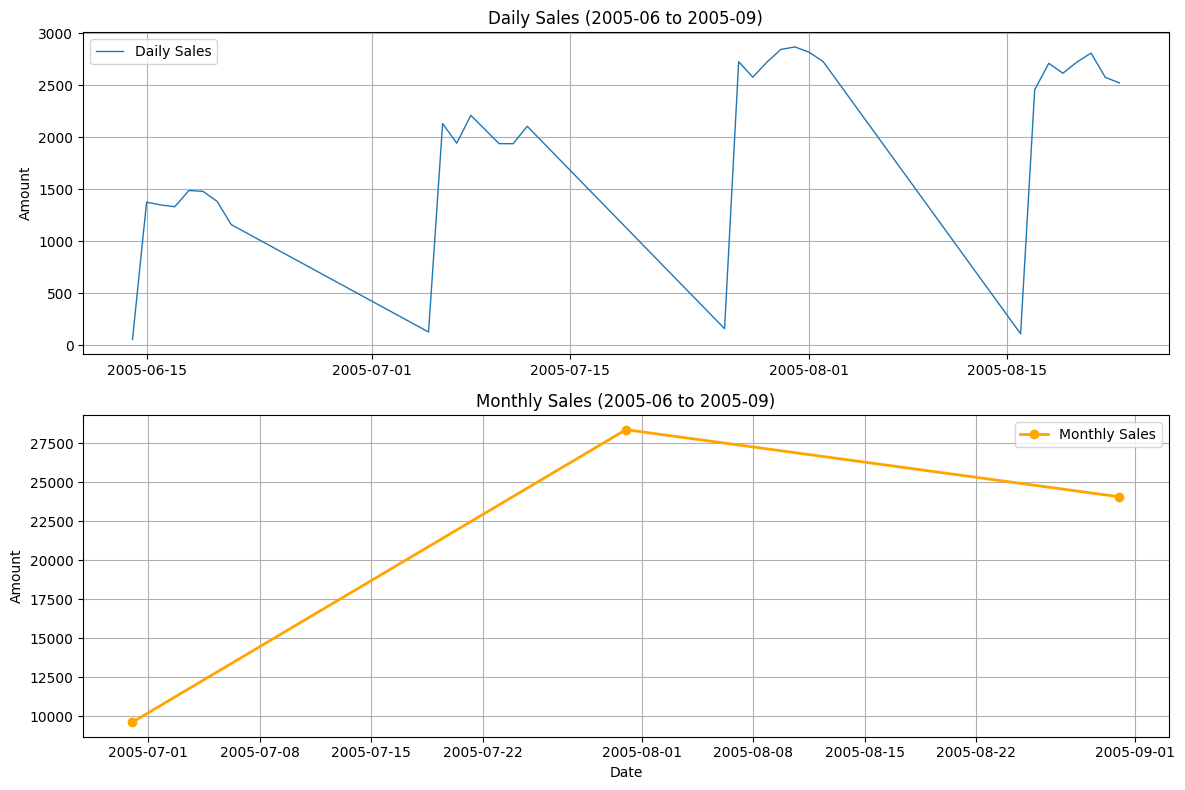

Saved: daily_sales_200506_200509.csv, monthly_sales_200506_200509.csv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

payment_csv = "csv_exports/payment.csv"

# データ読み込み
df = pd.read_csv(payment_csv, parse_dates=["payment_date"])
df["date"] = df["payment_date"].dt.floor("D")

# 期間フィルタ：2005年6月1日～9月30日
mask = (df["date"] >= "2005-06-01") & (df["date"] <= "2005-09-30")
df = df.loc[mask]

# 日単位の売上推移
daily_sales = df.groupby("date")["amount"].sum()

# 月単位の売上推移
monthly_sales = df.set_index("date")["amount"].resample("M").sum()

# === グラフ描画 ===
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=False)

# 日次売上
axes[0].plot(daily_sales.index, daily_sales.values, linewidth=1, label="Daily Sales")
axes[0].set_title("Daily Sales (2005-06 to 2005-09)")
axes[0].set_ylabel("Amount")
axes[0].grid(True)
axes[0].legend()

# 月次売上
axes[1].plot(monthly_sales.index, monthly_sales.values, marker="o", linewidth=2, color="orange", label="Monthly Sales")
axes[1].set_title("Monthly Sales (2005-06 to 2005-09)")
axes[1].set_xlabel("Date")
axes[1].set_ylabel("Amount")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

# CSV保存（任意）
daily_sales.to_csv("daily_sales_200506_200509.csv", header=["amount"])
monthly_sales.to_csv("monthly_sales_200506_200509.csv", header=["amount"])
print("Saved: daily_sales_200506_200509.csv, monthly_sales_200506_200509.csv")
